# zero-to-gbms-final-project

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="zero-to-gbms-final-project")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od
data_set_url = 'https://www.kaggle.com/c/stayalert/data'
od.download(data_set_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  hemanthkotagiri


Your Kaggle Key:

  ································


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18.2M/18.2M [00:06<00:00, 3.13MB/s]



Extracting archive ./stayalert/stayalert.zip to ./stayalert


In [8]:
import os
os.chdir("stayalert")

In [9]:
!pip install pandas numpy matplotlib seaborn sklearn --quiet

In [10]:
import pandas as pd
import numpy as np

In [11]:
os.listdir()

['example_submission.csv', 'fordTest.csv', 'fordTrain.csv', 'Solution.csv']

In [12]:
training_data = pd.read_csv("fordTrain.csv")
testing_data = pd.read_csv("fordTest.csv")

In [13]:
training_data.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [14]:
testing_data.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


## Driver Alertness Detection

Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

#### Problem Statement
The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

#### Modeling Objective
In this project, we are supposed to design a classifier that has the ability to potentially detect the alertness of a driver given a set of features.

## Exploratory Data Analysis

I would be using Pandas, Matplotlib and Seaborn for EDA aspects of this project

In [15]:
training_data.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [16]:
data = training_data

In [17]:
pd.set_option('display.max_columns', 33)

We can drop the observation number as well as trailID since they do not contribute in any sense for our model development

In [18]:
data.drop(["TrialID", "ObsNum"], axis=1, inplace=True)

In [19]:
print("There are total of {} different features.".format(len(data.drop("IsAlert", axis=1).columns)))

There are total of 30 different features.


In [20]:
# Checking for Null values
data.isna().sum()

IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

### Univariate & Bivariate Analysis

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})

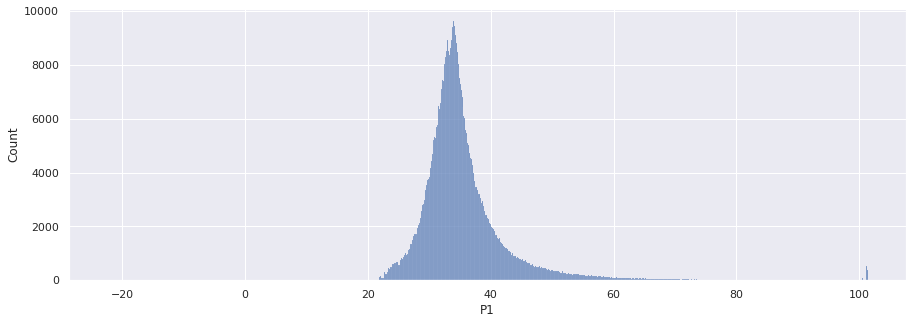

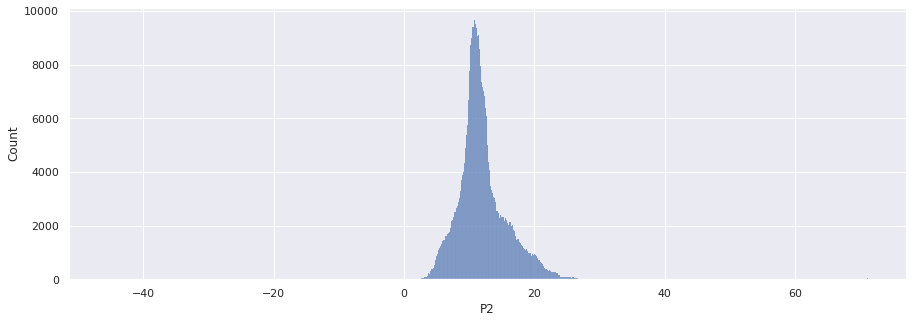

In [22]:
sns.histplot(data["P1"])
plt.show()
sns.histplot(data["P2"])
plt.show()

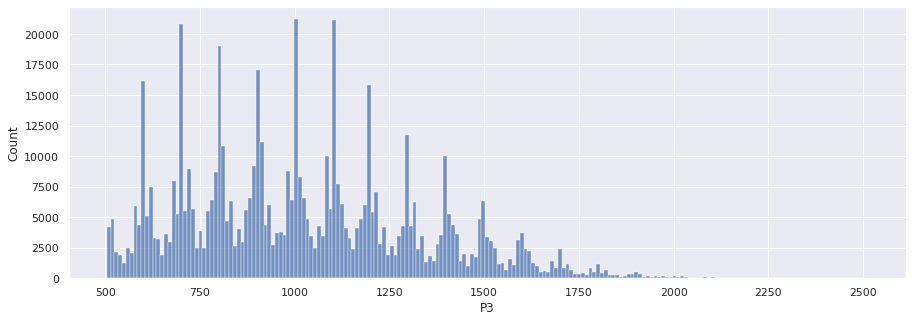

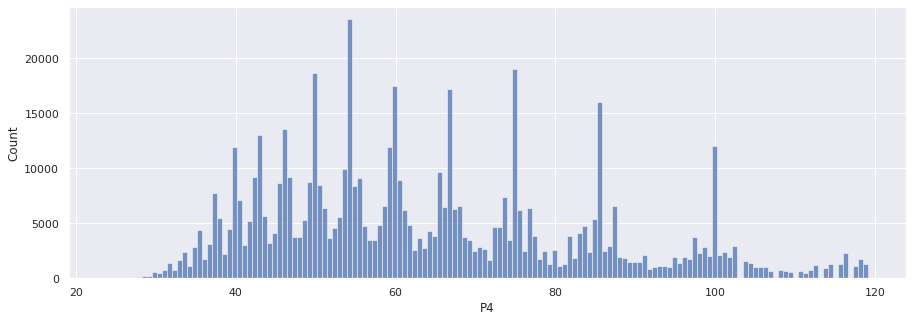

In [23]:
sns.histplot(data["P3"])
plt.show()
sns.histplot(data["P4"])
plt.show()

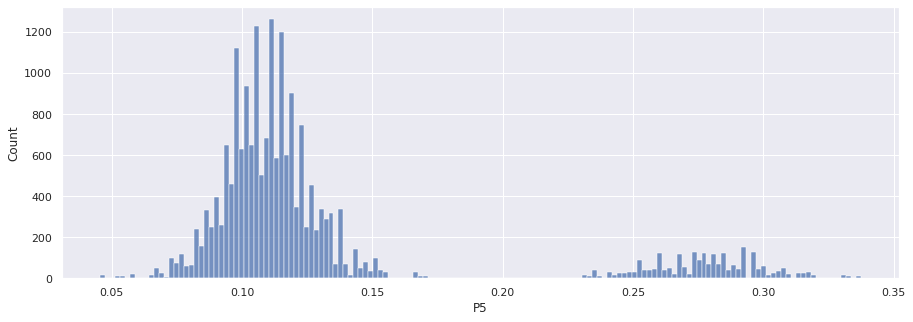

In [24]:
sns.histplot(data["P5"].head(20_000))
plt.show()

#### From the above, I conclude that there the values that are above 0.15 are outliers for the feature P5. Therefore, I shall drop the data-points that are above the value 0.15

In [25]:
ftr = data["P5"] < 0.20
data = data[ftr]
data.head()

,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,0,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,0,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,0,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,0,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,0,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.66,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144


(459940, 31)


<AxesSubplot:xlabel='P5', ylabel='Count'>

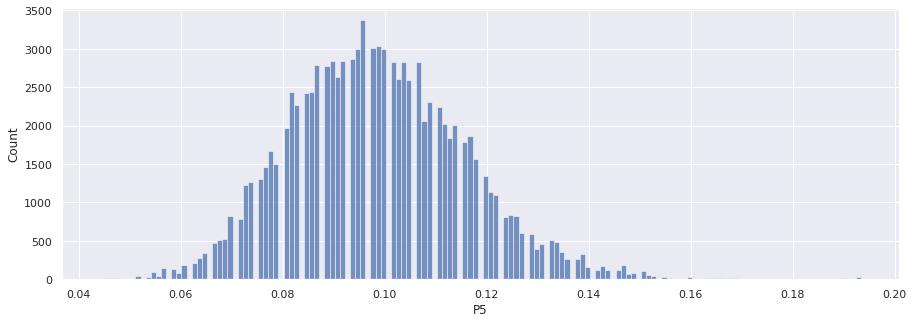

In [26]:
print(data.shape)
sns.histplot(data["P5"].head(100_000))

0    459940
Name: P8, dtype: int64


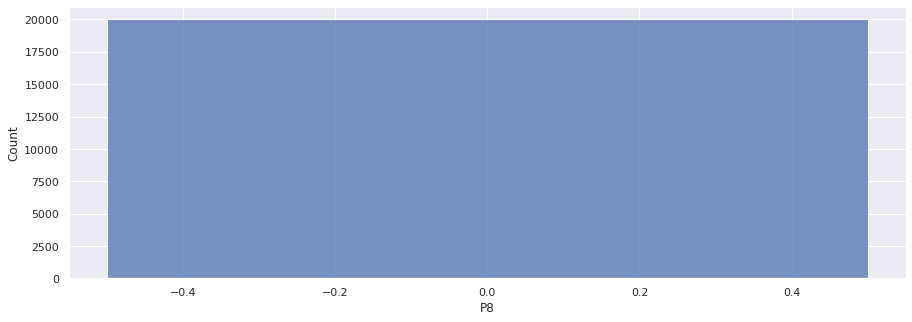

In [27]:
# This plot show's that the value of P8 is always zero. Therefore, will drop it
print(data["P8"].value_counts())
sns.histplot(data["P8"].head(20_000))
plt.show()

In [28]:
data = data.drop("P8", axis=1)

#### `E1` and `E2` has a very unusual distribution, so dropping it.

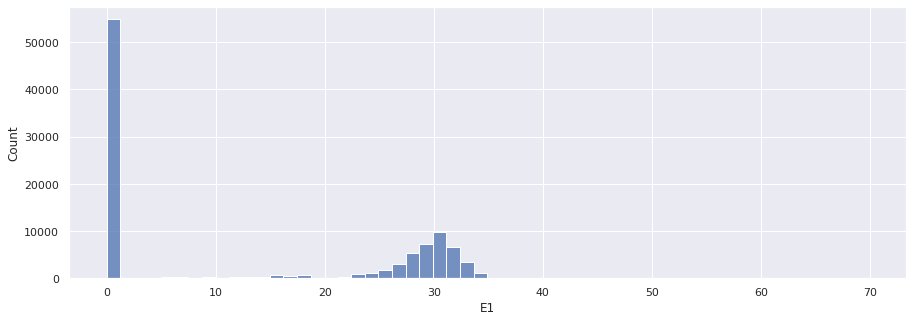

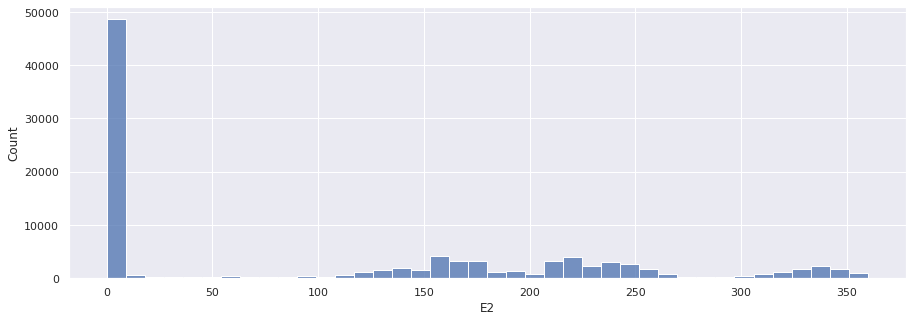

In [29]:
sns.histplot(data["E1"].head(100_000))
plt.show()
sns.histplot(data["E2"].head(100_000))
plt.show()

In [30]:
print("Value counts for E3 are: \n", data["E3"].value_counts())

Value counts for E3 are: 
 0    458268
1      1371
4       301
Name: E3, dtype: int64


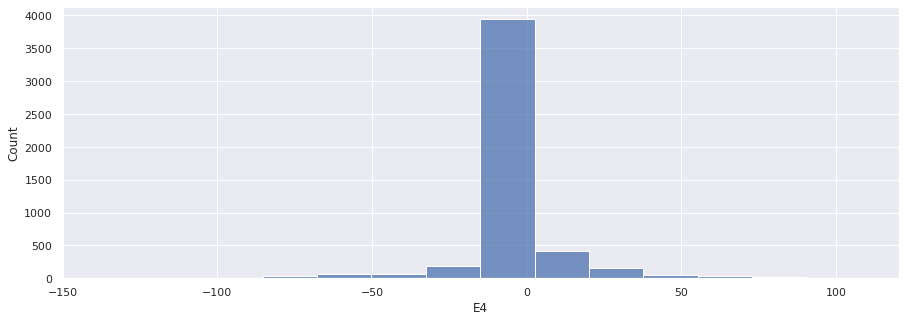

In [31]:
sns.histplot(data["E4"].head(5000))
plt.show()

#### We can see, that there are outliers before and after -100 and 100 respectively. Therefore, I shall drop them

In [32]:
print("Values of E4 that are less than -100")
data[data["E4"] < -100]

Values of E4 that are less than -100


,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
2237,1,37.9968,19.51430,1304,46.0123,0.105083,680,88.2353,0.000,0.000,0,-132,0.016505,398,3,2,1,60,0.0,93.18,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3235
2238,1,38.2023,8.02324,1304,46.0123,0.105083,680,88.2353,0.000,0.000,0,-132,0.016505,398,3,2,1,60,0.0,93.18,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3350
2239,1,38.3385,15.28020,1304,46.0123,0.105083,680,88.2353,0.000,0.000,0,-132,0.016505,398,3,2,1,60,1.6,92.87,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3348
2240,1,38.4348,10.24090,1304,46.0123,0.105083,680,88.2353,0.000,0.000,0,-132,0.016505,398,3,2,1,60,1.6,92.87,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3658
2732,0,37.7374,9.16250,1524,39.3701,0.108975,664,90.3614,18.516,209.480,0,-138,0.016568,385,10,7,0,30,0.0,16.83,0.000,752,10.5000,0,2161,0,29.9,0,1,16.6843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603651,1,40.0090,10.30960,680,88.2353,0.120651,600,100.0000,23.841,341.441,0,-128,0.017072,416,0,2,1,65,24.0,66.57,-2.135,1023,28.4812,1,1306,0,0.0,0,4,17.0335
603652,1,40.1742,17.54930,1428,42.0168,0.101191,604,99.3377,23.841,341.441,0,-128,0.017072,416,0,2,1,65,24.4,66.00,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0741
603653,1,40.3089,9.76309,1428,42.0168,0.101191,604,99.3377,23.841,341.441,0,-128,0.017072,416,0,2,1,65,24.4,66.00,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0846
603654,1,40.4124,15.31680,1428,42.0168,0.101191,604,99.3377,23.841,341.441,0,-128,0.017072,416,0,2,1,65,24.4,64.90,-2.415,255,28.4812,1,1276,0,0.0,0,4,17.0867


In [33]:
fltr = data["E4"] < -100
data = data.drop(data[fltr].index, axis=0)

In [34]:
fltr = data["E4"] > 100
data = data.drop(data[fltr].index, axis=0)

In [35]:
data

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.66,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


<AxesSubplot:xlabel='E5', ylabel='Count'>

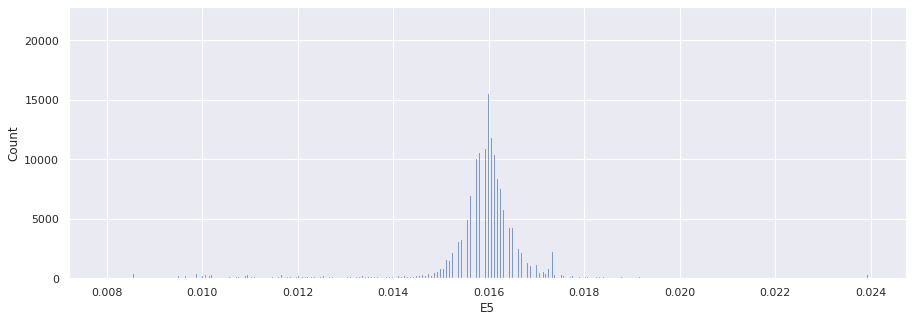

In [36]:
sns.histplot(data["E5"].head(200_000))

#### Dropping the outliers before 0.012 and after 0.020

In [37]:
fltr = data["E5"] < 0.012
data = data.drop(data[fltr].index, axis=0)

In [38]:
fltr = data["E5"] > 0.020
data = data.drop(data[fltr].index, axis=0)

In [39]:
data

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,17.807,222.11,0,14,0.016442,319,2,2,1,64,0.0,91.55,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.60,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,17.807,222.11,0,14,0.016568,321,2,2,1,64,0.0,91.66,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


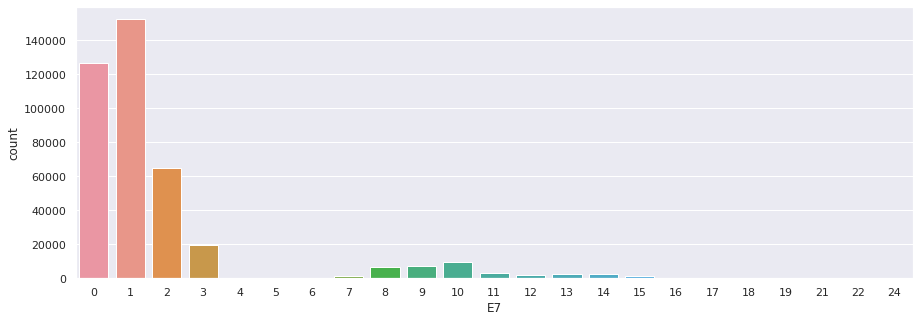

In [40]:
sns.countplot(x = data["E7"])
plt.show()

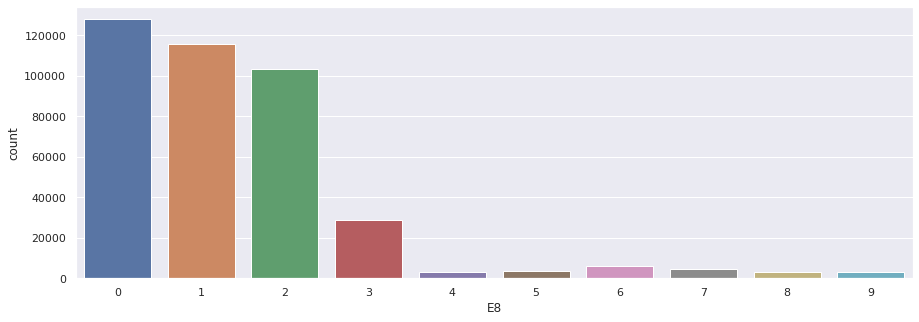

In [41]:
sns.countplot(x = data["E8"])
plt.show()

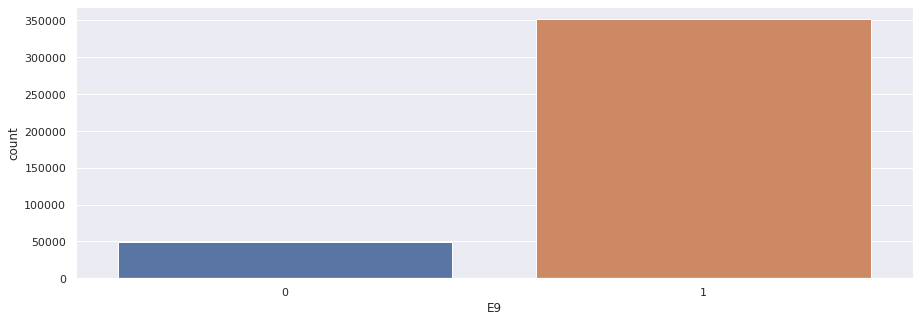

In [42]:
sns.countplot(x = data["E9"])
plt.show()

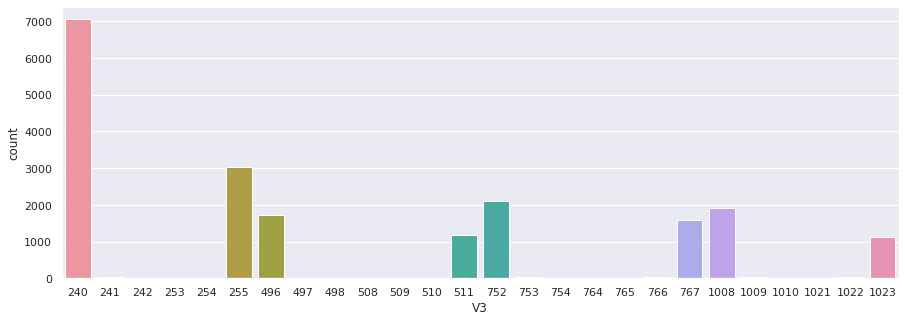

In [43]:
sns.countplot(x=data["V3"].head(20000))
plt.show()

In [44]:
# Will drop the V7 Feature
data["V7"].value_counts()

0    399842
Name: V7, dtype: int64

In [45]:
data = data.drop("V7", axis=1)

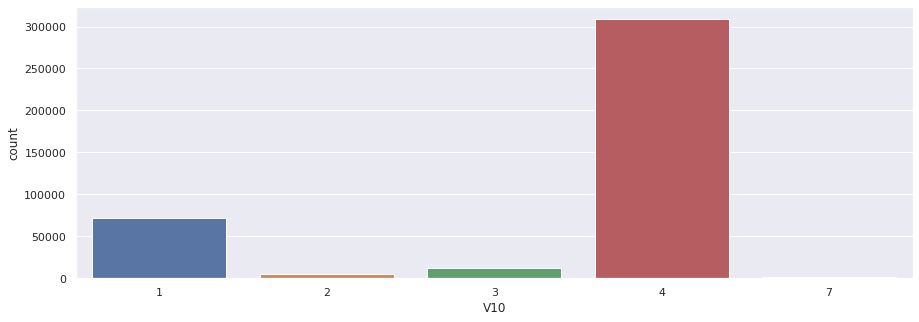

In [46]:
sns.countplot(x=data["V10"])
plt.show()

In [47]:
data["V9"].value_counts()

0    399842
Name: V9, dtype: int64

In [48]:
data = data.drop("V9", axis=1)

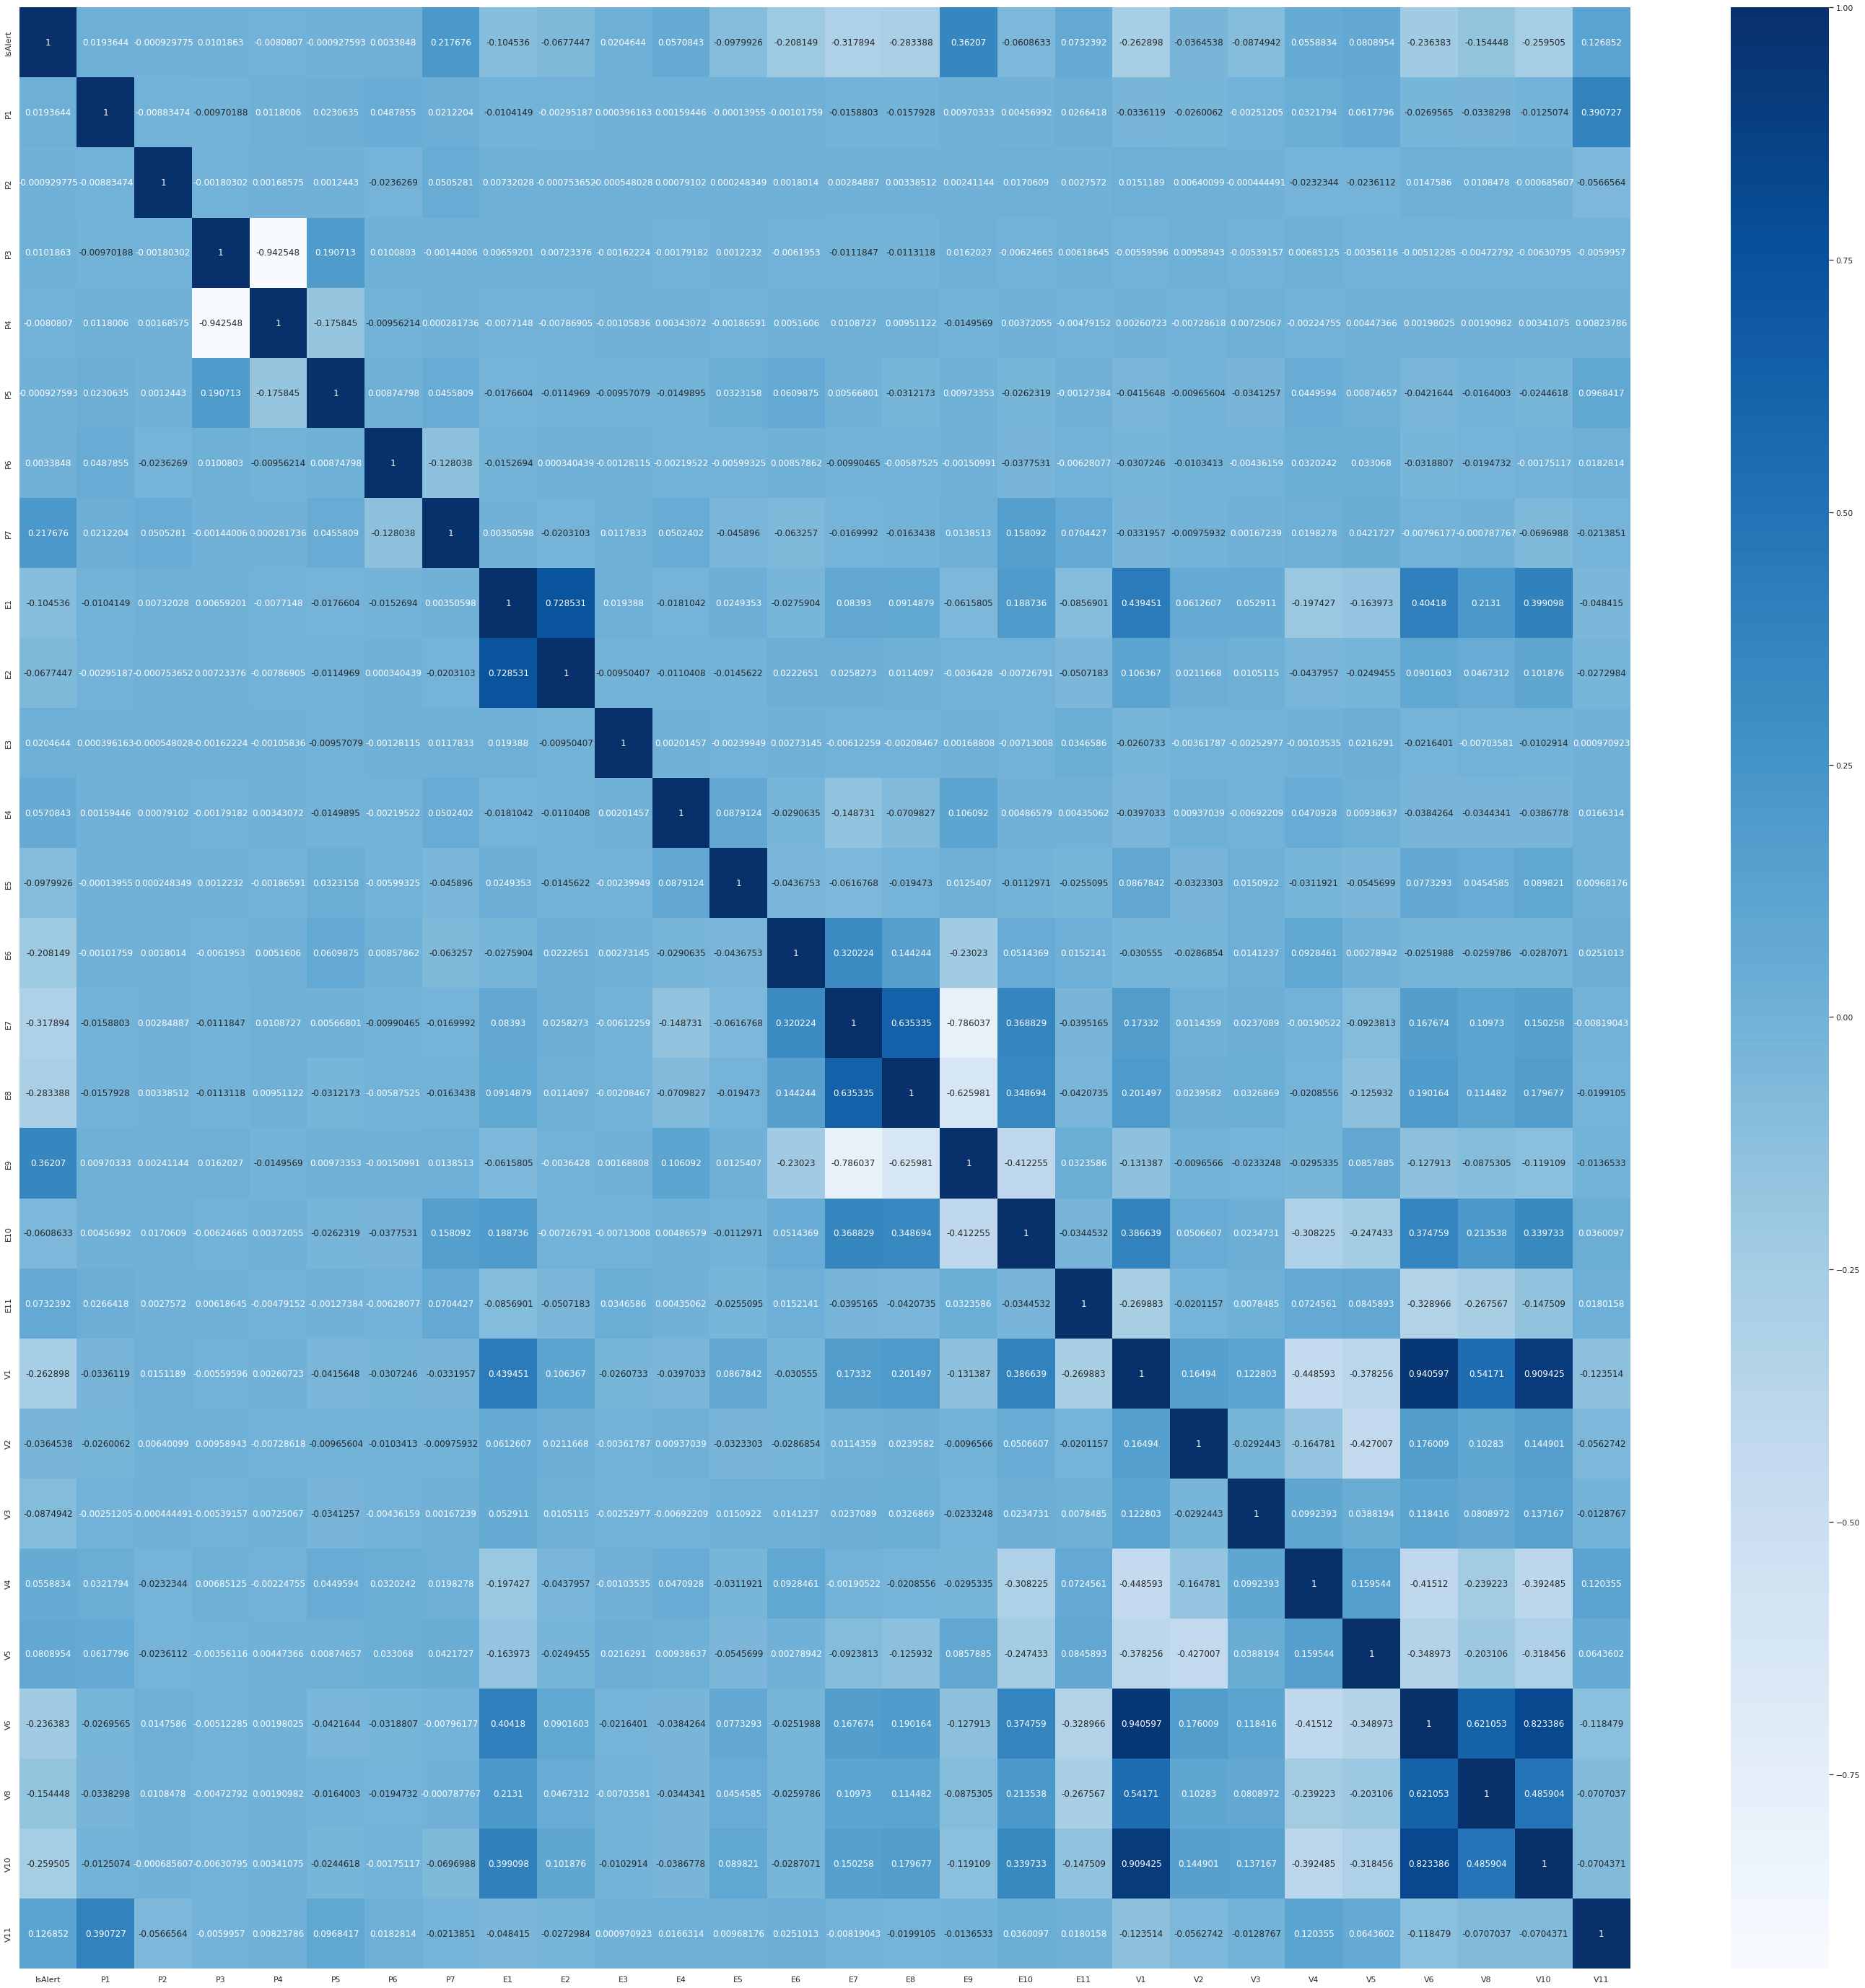

In [49]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='g', ax=ax)
plt.show()

## Feature Engineering

I will be using the StandardScaler to scale the dataset

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [51]:
y = data["IsAlert"]

In [52]:
cols = list(data.columns)
cols.remove("IsAlert")
X = data[cols]

In [53]:
new = scaler.fit_transform(X)

## Model Building

In [54]:
!pip install sklearn

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [56]:
lr = LogisticRegression()
tree = DecisionTreeClassifier()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new, y)

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.7641080021208271

In [60]:
tree.fit(X_train, y_train)
accuracy_score(y_test, tree.predict(X_test))

0.9864046978321546

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
accuracy_score(y_test, nb.predict(X_test))

0.6509938876161703

In [62]:
os.chdir("../")
jovian.commit(filename='zero-to-gbms-final-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:

  ·································································································································································································································································································································


[jovian] Committed successfully! https://jovian.ai/hemanth-kotagiri/zero-to-gbms-final-project-a604e


'https://jovian.ai/hemanth-kotagiri/zero-to-gbms-final-project-a604e'

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gf = GradientBoostingClassifier()
gf.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
accuracy_score(y_test, gf.predict(X_test)) * 100

88.21840517801944

In [83]:
from sklearn.tree import ExtraTreeClassifier
cnb = ExtraTreeClassifier()
cnb.fit(X_train, y_train)

ExtraTreeClassifier()

In [84]:
accuracy_score(y_test, cnb.predict(X_test))

0.9763107611968668

In [85]:
jovian.commit(filename='zero-to-gbms-final-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hemanth-kotagiri/zero-to-gbms-final-project-a604e" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/hemanth-kotagiri/zero-to-gbms-final-project-a604e


'https://jovian.ai/hemanth-kotagiri/zero-to-gbms-final-project-a604e'